<a href="https://colab.research.google.com/github/farrelrassya/Machine-Learning-with-Imbalanced-Dataset-Udemy/blob/main/Section%203%20Metrics%20Evaluation%20/%209_ROC-AUC%20and%20PRC%20Comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this notebook I compare the display of ROC and PR curves in a balanced and imbalanced dataset, which have similar class separability.

We can change the separability parameter when we create the toy dataset, to compare results on datasets with different degree of class separability.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_blobs
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

from sklearn.metrics import (
    roc_auc_score,
    PrecisionRecallDisplay,
    RocCurveDisplay,
)

In [2]:
# function to create data

def create_data(imbalanced=True, separability=3):

    # Configuration options
    blobs_random_seed = 42
    centers = [(0, 0), (separability, separability)]
    cluster_std = 1.5
    num_features_for_samples = 2
    num_samples_total = 1600

    # Generate X
    X, y = make_blobs(
        n_samples=num_samples_total,
        centers=centers,
        n_features=num_features_for_samples,
        cluster_std=cluster_std)

    # transform arrays to pandas formats
    X = pd.DataFrame(X, columns=['VarA', 'VarB'])
    y = pd.Series(y)

    if imbalanced:
    # create an imbalancced Xset
    # (make blobs creates same number of obs per class
    # we need to downsample manually)
        X = pd.concat([
            X[y == 0].sample(1500,replace=True, random_state=34),
            X[y == 1].sample(100, random_state=42)
        ], axis=0)

        y = y.loc[X.index]

    # display size
    print(X.shape, y.shape)
    return X, y

(1600, 2) (1600,)


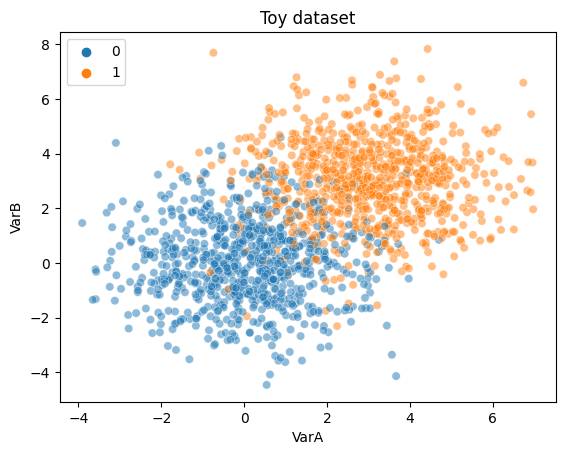

In [3]:
X, y = create_data(imbalanced=False, separability=3)

sns.scatterplot(
    data=X, x="VarA", y="VarB", hue=y, alpha=0.5
)

plt.title('Toy dataset')
plt.show()

In [4]:
# balanced target

y.value_counts() / len(y)

1    0.5
0    0.5
dtype: float64

(1600, 2) (1600,)


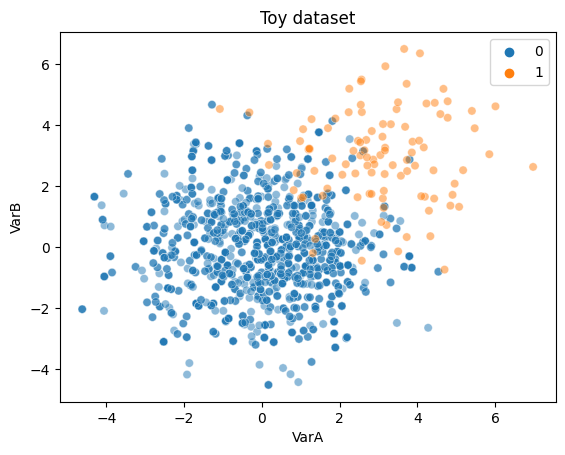

In [5]:
X_im, y_im = create_data(imbalanced=True, separability=3)

sns.scatterplot(
    data=X_im, x="VarA", y="VarB", hue=y_im, alpha=0.5
)

plt.title('Toy dataset')
plt.show()


In [6]:
# imbalanced target

y_im.value_counts() / len(y_im)

0    0.9375
1    0.0625
dtype: float64

In [7]:
# separate dataset into train and test

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)

X_train.shape, X_test.shape

((1120, 2), (480, 2))

In [8]:
# separate dataset into train and test

X_train_im, X_test_im, y_train_im, y_test_im = train_test_split(
    X_im, y_im, test_size=0.3, random_state=0)

X_train_im.shape, X_test_im.shape

((1120, 2), (480, 2))

In [9]:
rf = RandomForestClassifier(n_estimators=100, random_state=39, max_depth=2, n_jobs=4)

rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, n_jobs=4, random_state=39)

In [10]:
rf_im = RandomForestClassifier(n_estimators=100, random_state=39, max_depth=2, n_jobs=4)

rf_im.fit(X_train_im, y_train_im)

RandomForestClassifier(max_depth=2, n_jobs=4, random_state=39)

In [11]:
print('ROC-AUC Balanced data test:', roc_auc_score(y_test, rf.predict_proba(X_test)[:,1]))
print('ROC-AUC Imbalanced data test:', roc_auc_score(y_test_im, rf_im.predict_proba(X_test_im)[:,1]))


ROC-AUC Balanced data test: 0.9743123575566728
ROC-AUC Imbalanced data test: 0.9730398995535714


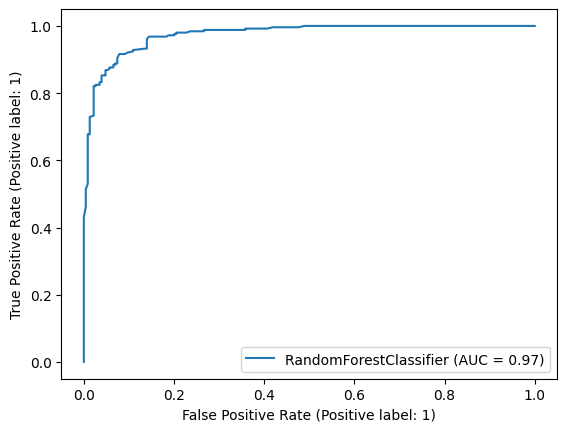

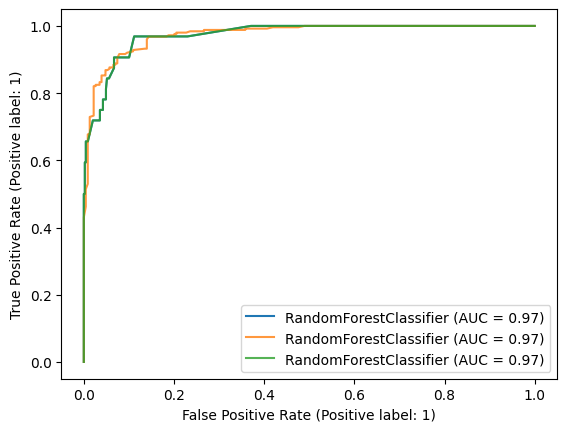

In [12]:
rf_disp = RocCurveDisplay.from_estimator(rf, X_test, y_test)
rf_im_disp = RocCurveDisplay.from_estimator(rf_im, X_test_im, y_test_im)

ax = plt.gca()
rf_disp.plot(ax=ax, alpha=0.8)
rf_im_disp.plot(ax=ax, alpha=0.8)

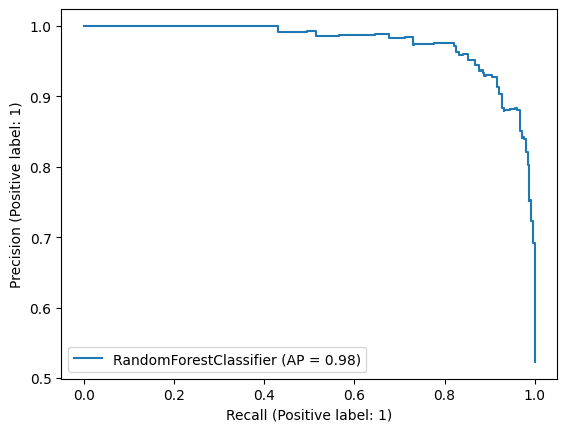

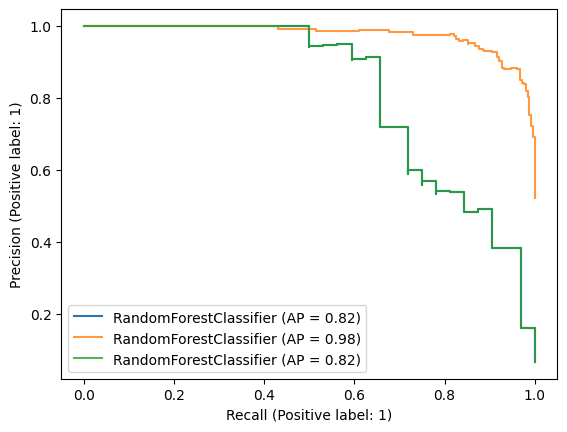

In [13]:
rf_disp = PrecisionRecallDisplay.from_estimator(rf, X_test, y_test)
rf_im_disp = PrecisionRecallDisplay.from_estimator(rf_im, X_test_im, y_test_im)

ax = plt.gca()
rf_disp.plot(ax=ax, alpha=0.8)
rf_im_disp.plot(ax=ax, alpha=0.8)

We see that because the values of the ROC-AUC are already high, it is harder to discriminate the performance of the models.

But the PRC curve makes that difference more visually clear.